* [Coronavirus-Dataset | Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset)

```
1. patient 데이터셋 정보
- id: 확진자의 id (n번째 확진자)
- sex: 성별
- birth_year: 출생 연도
- country: 국적
- region: 주 활동 지역 (광역시/도 단위)
- group: 특정 집단 관련
- infection_reason: 감염 경로
- infection_order: 감염 차수 (n차 감염)
- infected_by: 해당 확진자의 감염원 id
- contact_number: 접촉자 수
- confirmed_date: 확진 일자
- released_date: 퇴원 일자 (격리 해제 일자)
- deceased_date: 사망 일자
- state: 상태

2. route 데이터셋 정보
- id: 확진자의 id (n번째 확진자)
- date: 일자
- province: 특별시/광역시/도
- city: 시/군/구
- visit: 방문한 장소 (종류)
- latitude: 위도
- longitude: 경도

3. time 데이터셋 정보
- date: 일자
- acc_test: 누적 검사 수 (진행 중인 검사 포함)
- acc_negative: 누적 음성 결과 수
- acc_confirmed: 누적 양성 결과 수 (확진)
- acc_released: 누적 격리 해제 수
- acc_deceased: 누적 사망 수
- new_test: 신규 검사 수
- new_negative: 신규 음성 결과 수
- new_confirmed: 신규 양성 결과 수 (확진)
- new_released: 신규 격리 해제 수
```

## 라이브러리 로드

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="MalgunGothic")
sns.set(font="AppleGothic")

plt.rc("axes", unicode_minus=False)

### 데이터셋 불러오기

In [2]:
df = pd.read_csv("data/patient.csv")
df.shape

(4812, 14)

In [3]:
# head 로 미리보기
df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [4]:
# tail 로 미리보기
df.tail()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
4807,4808,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4808,4809,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4809,4810,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4810,4811,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4811,4812,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated


In [5]:
# info로 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 14 columns):
id                  4812 non-null int64
sex                 383 non-null object
birth_year          370 non-null float64
country             4812 non-null object
region              371 non-null object
group               81 non-null object
infection_reason    140 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      47 non-null float64
confirmed_date      4812 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               4812 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 526.4+ KB


In [6]:
# 결측치 수 보기
df.isnull().sum()

id                     0
sex                 4429
birth_year          4442
country                0
region              4441
group               4731
infection_reason    4672
infection_order     4777
infected_by         4742
contact_number      4765
confirmed_date         0
released_date       4780
deceased_date       4792
state                  0
dtype: int64

## 컬럼정보 만들기
* 영문으로 된 컬럼명을 한글로 표현하고자 할 때 사용합니다.
* text 데이터로 dict 형태의 데이터 만들기

In [7]:
cols_text = """- id: 확진자의 id (n번째 확진자)
- sex: 성별
- birth_year: 출생 연도
- country: 국적
- region: 주 활동 지역 (광역시/도 단위)
- group: 특정 집단 관련
- infection_reason: 감염 경로
- infection_order: 감염 차수 (n차 감염)
- infected_by: 해당 확진자의 감염원 id
- contact_number: 접촉자 수
- confirmed_date: 확진 일자
- released_date: 퇴원 일자 (격리 해제 일자)
- deceased_date: 사망 일자
- state: 상태"""
cols_text

'- id: 확진자의 id (n번째 확진자)\n- sex: 성별\n- birth_year: 출생 연도\n- country: 국적\n- region: 주 활동 지역 (광역시/도 단위)\n- group: 특정 집단 관련\n- infection_reason: 감염 경로\n- infection_order: 감염 차수 (n차 감염)\n- infected_by: 해당 확진자의 감염원 id\n- contact_number: 접촉자 수\n- confirmed_date: 확진 일자\n- released_date: 퇴원 일자 (격리 해제 일자)\n- deceased_date: 사망 일자\n- state: 상태'

In [8]:
cols_text = cols_text.replace("- ", "'").replace("\n", "',").replace(": ", "':'")
cols_text

"'id':'확진자의 id (n번째 확진자)','sex':'성별','birth_year':'출생 연도','country':'국적','region':'주 활동 지역 (광역시/도 단위)','group':'특정 집단 관련','infection_reason':'감염 경로','infection_order':'감염 차수 (n차 감염)','infected_by':'해당 확진자의 감염원 id','contact_number':'접촉자 수','confirmed_date':'확진 일자','released_date':'퇴원 일자 (격리 해제 일자)','deceased_date':'사망 일자','state':'상태"

In [9]:
cols = "{"+cols_text+"'}"
cols = eval(cols)
cols

{'id': '확진자의 id (n번째 확진자)',
 'sex': '성별',
 'birth_year': '출생 연도',
 'country': '국적',
 'region': '주 활동 지역 (광역시/도 단위)',
 'group': '특정 집단 관련',
 'infection_reason': '감염 경로',
 'infection_order': '감염 차수 (n차 감염)',
 'infected_by': '해당 확진자의 감염원 id',
 'contact_number': '접촉자 수',
 'confirmed_date': '확진 일자',
 'released_date': '퇴원 일자 (격리 해제 일자)',
 'deceased_date': '사망 일자',
 'state': '상태'}

In [10]:
# 확진 일자 컬럼을 가져와서 봅니다.
cols['confirmed_date']

'확진 일자'

## 일자별 확진자와 누적확진자
### countplot 사용하기

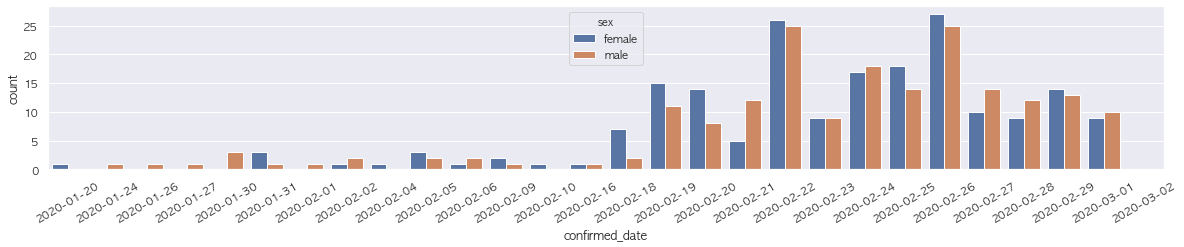

In [11]:
# seaborn 의 countplot 으로 시각화
plt.figure(figsize=(20, 3))
plt.xticks(rotation=30)
sns.countplot(data=df, x="confirmed_date", hue="sex")

### 날짜표현을 다르게 하기

In [12]:
df["확진일자"] = df["confirmed_date"].astype(str).map(lambda x: x[-5:])

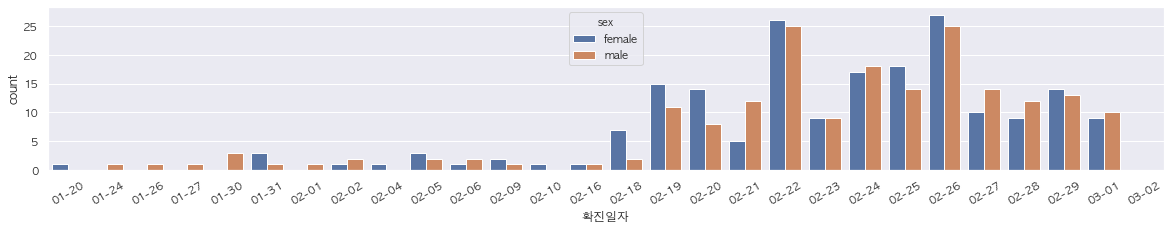

In [13]:
plt.figure(figsize=(20, 3))
plt.xticks(rotation=30)
sns.countplot(data=df, x="확진일자", hue="sex")

### value_counts를 이용해서 일자별 확진자와 누적확진자 수 구하기

In [14]:
# value_counts 를 이용해서 일자별 확진자와 누적확진자 수를 구합니다.
day_count = df["confirmed_date"].value_counts().sort_index().reset_index()
day_count.columns = ["date", "count"]
day_count["sum"] = day_count["count"].cumsum()
day_count["date"] = day_count["date"].astype(str)
day_count

,date,count,sum
0,2020-01-20,1,1
1,2020-01-24,1,2
2,2020-01-26,1,3
3,2020-01-27,1,4
4,2020-01-30,3,7
5,2020-01-31,4,11
6,2020-02-01,1,12
7,2020-02-02,3,15
8,2020-02-04,1,16
9,2020-02-05,5,21


### value_counts 로 구한 결과 시각화 하기

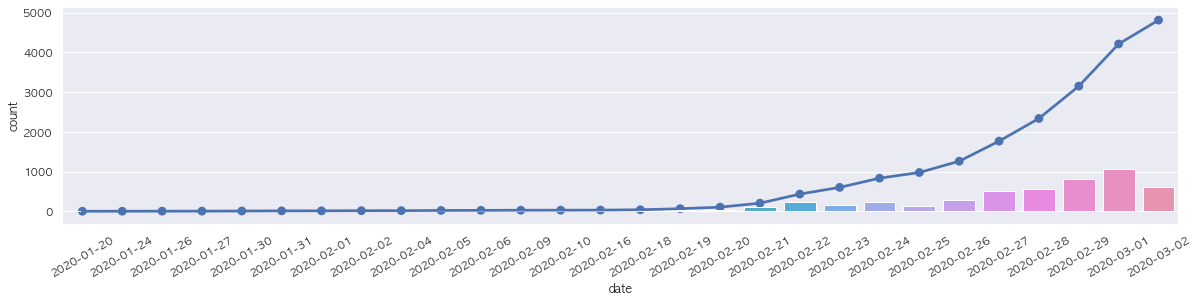

In [15]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=30)
sns.pointplot(data=day_count, x="date", y="sum")
sns.barplot(data=day_count, x="date", y="count")

### 로그가 없는 날짜도 0으로 값을 채워주기
* 확진자가 없는 날짜는 날짜컬럼에 없습니다. 그래서 날짜별로 변동을 보기 위해 1월 20일부터 마지막 로그 사이의 비어있는 날짜를 채웁니다.

In [16]:
# 컬럼명을 보기위해 데이터를 미리보기 합니다.
df.head(1)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,확진일자
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,01-20


In [17]:
# loc[행, 열] 로 데이터에 접근할 수 있습니다. 
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.
cnt = df.shape[0] - 1
first_day = df.loc[0, "confirmed_date"]
last_day = df.loc[cnt, "confirmed_date"]
last_day

'2020-03-02'

In [18]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
days = pd.DataFrame({"연월일": days})
days.head()

,연월일
0,2020-01-20
1,2020-01-21
2,2020-01-22
3,2020-01-23
4,2020-01-24


In [20]:
# days 의 데이터프레임 정보를 봅니다.
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 1 columns):
연월일    43 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 472.0 bytes


In [21]:
# df의 정보를 다시 봅니다. 두 데이터를 어떻게 merge 하면 좋을지 생각해 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 15 columns):
id                  4812 non-null int64
sex                 383 non-null object
birth_year          370 non-null float64
country             4812 non-null object
region              371 non-null object
group               81 non-null object
infection_reason    140 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      47 non-null float64
confirmed_date      4812 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               4812 non-null object
확진일자                4812 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 564.0+ KB


## 일자별, 성별 확진자 수
* groupby 로 데이터를 그룹화하여 성별에 따라 일자별 확진자 수를 구합니다.

In [22]:
g = df.groupby(["confirmed_date", "sex"])["id"].count().unstack()
g = g.sort_index().reset_index()
g

sex,confirmed_date,female,male
0,2020-01-20,1.0,NaN
1,2020-01-24,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-30,NaN,3.0
5,2020-01-31,3.0,1.0
6,2020-02-01,NaN,1.0
7,2020-02-02,1.0,2.0
8,2020-02-04,1.0,NaN
9,2020-02-05,3.0,2.0


In [23]:
days["연월일"] = days["연월일"].astype(str)

### merge 로 모든 날짜에 대한 데이터 만들기

In [24]:
days_all = days.merge(g, how="left", left_on="연월일", right_on="confirmed_date")
days_all.tail()

,연월일,confirmed_date,female,male
38,2020-02-27,2020-02-27,10.0,14.0
39,2020-02-28,2020-02-28,9.0,12.0
40,2020-02-29,2020-02-29,14.0,13.0
41,2020-03-01,2020-03-01,9.0,10.0
42,2020-03-02,NaN,NaN,NaN


### 성별 누적 확진자 수 구하기
* cumsum 을 사용해 누적 확진자의 수를 구합니다.

In [25]:
# 성별 누적 확진자 수 구하기
days_all["female_cum"] = days_all.female.fillna(0).cumsum()
days_all["male_cum"] = days_all.male.fillna(0).cumsum()
days_all.tail()

,연월일,confirmed_date,female,male,female_cum,male_cum
38,2020-02-27,2020-02-27,10.0,14.0,162.0,154.0
39,2020-02-28,2020-02-28,9.0,12.0,171.0,166.0
40,2020-02-29,2020-02-29,14.0,13.0,185.0,179.0
41,2020-03-01,2020-03-01,9.0,10.0,194.0,189.0
42,2020-03-02,NaN,NaN,NaN,194.0,189.0


### 성별 누적 확진 수
* Pandas 의 plot은 x축에 인덱스의 값을 y축에 컬럼의 값을 사용합니다.

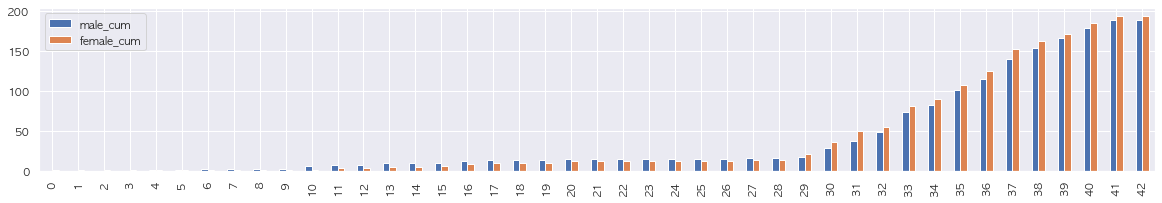

In [26]:
# 성별 확진 누적수를 시각화 합니다.
days_all[["male_cum", "female_cum"]].plot.bar(figsize=(20, 3))

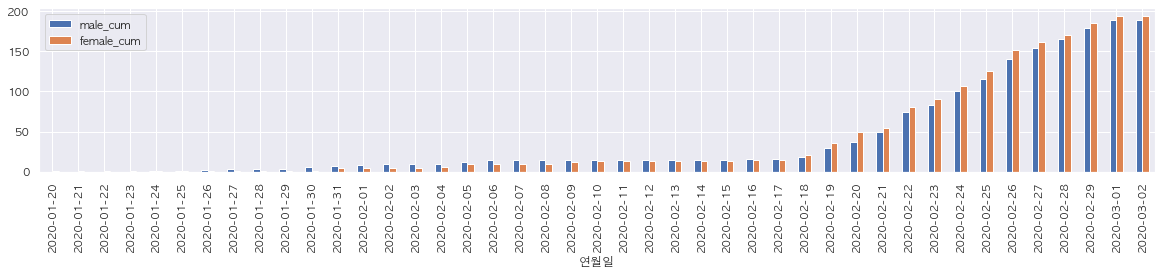

In [27]:
# 날짜를 x축에 나타내고자 하면 set_index 를 통해 연월일 컬럼을 인덱스로 지정합니다.

days_all = days_all.set_index("연월일")

days_all[["male_cum", "female_cum"]].plot.bar(figsize=(20, 3))

## 연령대별 확진자 보기

In [28]:
# 연령대에 결측치가 없는 데이터만 따로 df_age라는 변수에 담습니다.
df_age = df[df["birth_year"].notnull()].copy()
df_age.shape

(370, 15)

In [29]:
# birth_year를 수치데이터로 변환합니다.
# 나이를 계산해서 age 컬럼에 담습니다.
df_age["birth_year"] = df_age["birth_year"].astype(int)
df_age["age"] = 2020 - df_age["birth_year"]

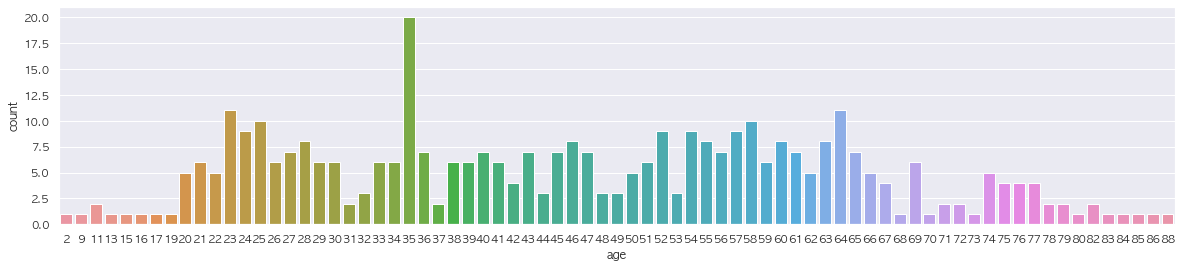

In [30]:
# countplot 으로 연령대 데이터를 시각화 합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df_age, x="age")

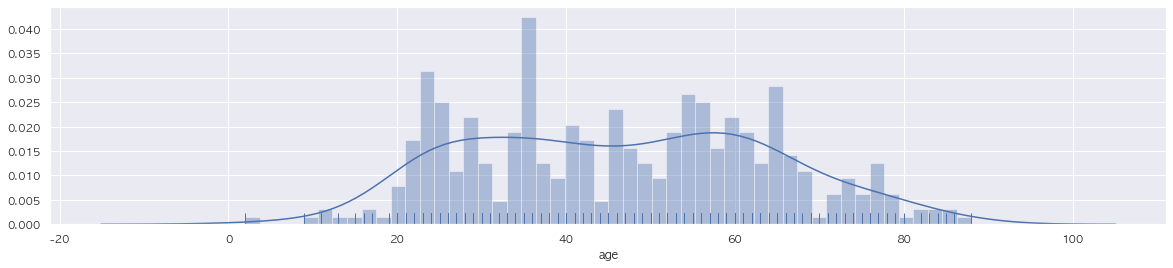

In [31]:
# distplot 으로 연령대의 분포를 봅니다.
plt.figure(figsize=(20, 4))
sns.distplot(df_age["age"], bins=50, rug=True)

## 접촉자 수

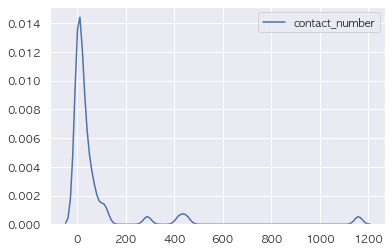

In [32]:
# kdeplot 으로 접촉차 수를 구합니다.
sns.kdeplot(df.loc[df["contact_number"].notnull(), "contact_number"])

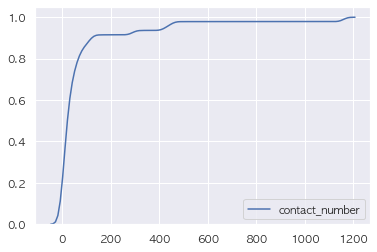

In [33]:
# 전체 접촉자수의 누적을 구합니다.

sns.kdeplot(df.loc[df["contact_number"].notnull(), "contact_number"], cumulative=True)

In [34]:
df[df["contact_number"] > 100]

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,확진일자
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released,01-31
11,12,male,1971.0,China,capital area,NaN,contact with patient in Japan,2.0,NaN,422.0,2020-02-01,2020-02-18,NaN,released,02-01
15,16,female,1977.0,Korea,Gwangju,NaN,visit to Thailand,1.0,NaN,450.0,2020-02-04,2020-02-19,NaN,released,02-04
16,17,male,1982.0,Korea,capital area,NaN,contact with patient in Singapore,2.0,NaN,290.0,2020-02-05,2020-02-12,NaN,released,02-05
28,29,male,1938.0,Korea,capital area,NaN,contact with patient,4.0,83.0,117.0,2020-02-16,NaN,NaN,isolated,02-16
30,31,female,1959.0,Korea,Daegu,Shincheonji Church,NaN,NaN,NaN,1160.0,2020-02-18,NaN,NaN,isolated,02-18


## 상태값 보기

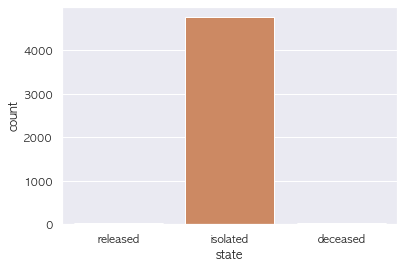

In [35]:
# 격리해제, 격리, 사망 상태에 따라 state 를 countplot 으로 시각화 합니다.
sns.countplot(data=df, x="state")

In [36]:
df["state"].value_counts()

isolated    4757
released      35
deceased      20
Name: state, dtype: int64

## 사망자 연령대 보기

In [37]:
cols["deceased_date"]

'사망 일자'

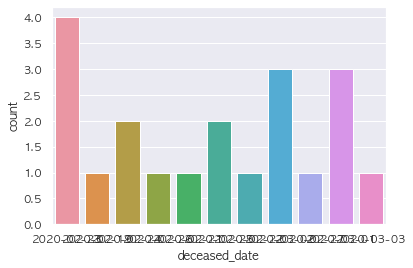

In [38]:
sns.countplot(data=df, x="deceased_date")

In [39]:
## 연령대 컬럼 만들기

In [40]:
deceased = df[df["state"] == "deceased"].copy()
deceased["age"] =  2020 - deceased["birth_year"]

### 날짜별 사망자 평균 연령

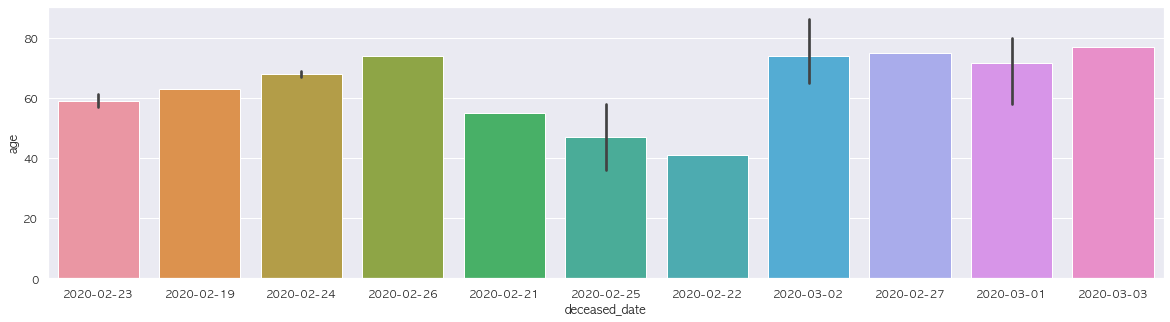

In [41]:
# barplot 으로 사망자 연령대의 평균을 봅니다.
plt.figure(figsize=(20, 5))
sns.barplot(data=deceased, x="deceased_date", y="age")

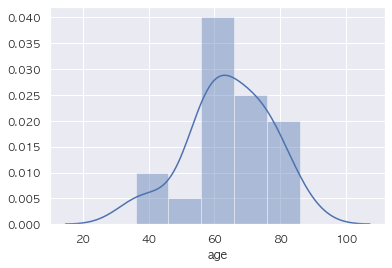

In [42]:
# distplot 으로 사망자 연령대의 분포를 봅니다.
sns.distplot(deceased["age"])

## 감염집단 보기

In [43]:
df["group"].value_counts()

Shincheonji Church               51
Eunpyeong St. Mary's Hospital    13
Cheongdo Daenam Hospital          9
Pilgrimage                        6
Myungsung church                  1
Onchun Church                     1
Name: group, dtype: int64

In [44]:
df["infection_reason"].value_counts()

contact with patient                 71
visit to Daegu                       42
visit to Wuhan                        8
pilgrimage to Israel                  6
visit to Thailand                     2
residence in Wuhan                    2
contact with patient in Singapore     2
visit to Vietnam                      1
visit to Cheongdo Daenam Hospital     1
visit to Italy                        1
visit to China                        1
 visit to China                       1
visit to Japan                        1
contact with patient in Japan         1
Name: infection_reason, dtype: int64

In [45]:
cols["region"]

'주 활동 지역 (광역시/도 단위)'

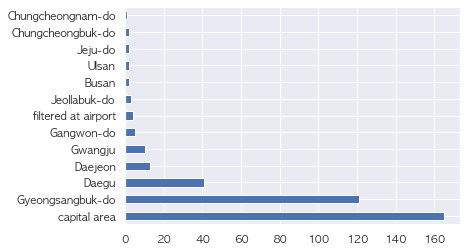

In [46]:
df["region"].value_counts().plot.barh()